In [1]:
# Imports and dataset
import pandas as pd
from matplotlib.pyplot import figure, savefig, show
import matplotlib.pyplot as plt
import dslabs_functions_nao_apagar as ds
import re
original_dataset = pd.read_csv('class_credit_score.csv', sep=',', decimal='.', na_values='')


In [2]:
# Treat columns
import numpy as np

columns_to_treat = ["Age", "SSN", "Num_Bank_Accounts", "Interest_Rate", "NumofLoan", "Payment_of_Min_Amount", "MonthlyBalance"]
relevant = ["Age", "Num_Bank_Accounts", "Interest_Rate", "NumofLoan", "Payment_of_Min_Amount", "MonthlyBalance"]

df = pd.DataFrame(original_dataset)

cha = df["Credit_History_Age"]
cha_month = []
cha_real = []
cha_year = []

for val in cha:
    matches = re.findall(r'(\d+) Years and (\d+) Months', str(val))
    if matches == [] or val == np.nan:
        cha_real.append(np.nan)
        cha_month.append(np.nan)                                                                   # Gerar colunas para separação de credit history age
        cha_year.append(np.nan)
    else:
        cha_real.append(float(matches[0][0]) + ((float(matches[0][1]) - 1) / 12))
        cha_month.append(int(matches[0][1]))
        cha_year.append(int(matches[0][0]))

df["Credit_History_Age"] = cha_real
#df["Credit_History_Age_Month"] = cha_month
#df["Credit_History_Age_Year"] = cha_year



job_to_field = {
    'Developer': 'STEM',
    'Engineer': 'STEM',
    'Scientist': 'STEM',
    'Doctor': 'STEM',
    'Entrepreneur': 'Business',
    'Manager': 'Business',
    'Accountant': 'Services',
    'Mechanic': 'Services',
    'Teacher': 'Services',
    'Lawyer': 'Services',
    'Architect': 'Creative',
    'Writer': 'Creative',
    'Musician': 'Creative',
    'Media_Manager': 'Media',
    'Journalist': 'Media',                                                     # JobType column
    np.nan: np.nan
}

df['JobType'] = df['Occupation'].map(lambda x: job_to_field[x])

df['Payment_Behaviour_Spend'] = df['Payment_Behaviour'].apply(lambda x: "High" if "High_spent" in str(x) else "Low")
df['Payment_Behaviour_Value'] = df['Payment_Behaviour'].apply(lambda x: "Small" if "Small_value" in str(x) else ("Medium" if "Medium_value" in str(x) else "Large"))

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].apply(lambda x: np.nan if x == -500 or x >= 150 else x)
df['Age'] = df['Age'].astype(str).str.replace('_', '', regex=False).astype(float)

# Check and clean 'SSN' column
pattern = r'^\d{3}-\d{2}-\d{4}$'  # Replace this with your SSN regex pattern
df['SSN'] = df['SSN'].apply(lambda x: x if re.match(pattern, str(x)) else np.nan)

df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: x if x >= 0 else np.nan)

#df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: x if x >= 0 and x <= 60 else np.nan)

df['NumofLoan'] = df['NumofLoan'].apply(lambda x: x if x >= 0 else np.nan)

#df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: x if str(x) in ["Yes", "No"] else np.nan)

df['MonthlyBalance'] = df['MonthlyBalance'].apply(lambda x: x if x >= 0 else np.nan)

#for col in columns_to_treat:           # remover NAs das colunas relevantes
#    if col in relevant:
#       df = df[df[col].notna()]

In [ ]:
# Granularity Numerical
import matplotlib.pyplot as plt
import dslabs_functions as ds
import re
import numpy as np

n_histograms = [10, 25, 50]

units = {
    "Age": "(Years)",
    "Annual_Income": "($)",
	"Monthly_Inhand_Salary": "($)",
	"Num_Bank_Accounts": "",
    "Num_Credit_Card": "",
	"Interest_Rate": "(%)",
	"NumofLoan": "",
	"Delay_from_due_date": "(days)",
    "NumofDelayedPayment": "",
	"ChangedCreditLimit": "",
	"NumCreditInquiries": "",
    "OutstandingDebt": "($)",
	"CreditUtilizationRatio": "",
	"TotalEMIpermonth": "($)",
    "Amountinvestedmonthly": "($)",
	"MonthlyBalance": "($)",
    "CreditHistoryAge": "(Years)"
}

hist_age = df["Credit_History_Age"]
hist_vals = []

for val in hist_age:
    matches = re.findall(r'(\d+) Years and (\d+) Months', str(val))
    if matches == []:
        hist_vals += [np.nan]
    else:
        hist_vals += [float(matches[0][0]) + ((float(matches[0][1])-1)/12) ,]

df["CreditHistoryAge"] = hist_vals

t = df.select_dtypes(include=['number', 'float'])
t["Age"] = pd.to_numeric(df['Age'], errors='coerce')
variables = t.columns
rows, cols = ds.define_grid(len(variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n_h in n_histograms:
    for n in range(len(variables)):
        axs[i, j].set_title('Histogram for %s' % variables[n])
        axs[i, j].set_xlabel(f'{variables[n]} {units[variables[n]]}')
        axs[i, j].set_ylabel('Number of Records')

        # Adjusting the rwidth parameter to increase the distance between bars along the x-axis
        axs[i, j].hist(t[variables[n]].values, bins=n_h, color='lightblue', rwidth=0.9)  # Adjust rwidth

        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)

    savefig(f"images/figure_granularity_{n_h}.png")  # Save the figure
    show()
    rows, cols = ds.define_grid(len(variables))
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
    i, j = 0, 0

In [ ]:
# Granularity Symbolic
# Select columns with numerical and string data types
string_cols = df.select_dtypes(include="object").columns
symbolic_cols = [col for col in string_cols if col not in ["ID", "Name", "Customer_ID", "SSN", "Age", "Credit_History_Age"]]

# Combine numerical and string columns
rows, cols = ds.define_grid(len(symbolic_cols))

print(cols * ds.HEIGHT, rows * ds.HEIGHT)
fig, axs = plt.subplots(rows, cols, figsize=(cols * ds.HEIGHT, rows * ds.HEIGHT))
i, j = 0, 0
plt.subplots_adjust(hspace=1)

            
types = df["Type_of_Loan"]

types_values = []
for text in types:
    matches = re.findall(r'([\w\s-]+)(?:, | and |$)', str(text))
    m_filtered = [m if "and" not in m else m[4:] for m in matches]
    types_values += m_filtered

final = pd.Series(types_values).value_counts()

axs[i, j].set_title('Histogram for %s' % "Type_of_Loan")
axs[i, j].set_xlabel("Type_of_Loan")
axs[i, j].set_ylabel('Number of Records')
axs[i, j].bar(final.index, final.values, color = "lightblue")
axs[i, j].set_xticklabels(final.index, rotation=90)
i, j = i, j+1

for col in symbolic_cols:
    if col != "Type_of_Loan":
        axs[i, j].set_title('Histogram for %s' % col)
        axs[i, j].set_xlabel(col)
        axs[i, j].set_ylabel('Number of Records')
        value_counts = df[col].value_counts()
        axs[i, j].bar(value_counts.index, value_counts.values, color='lightblue')
        axs[i, j].set_xticklabels(value_counts.index, rotation=90)
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    
    


plt.savefig(f"images/figure_granularity_symbolic.png")  # Save the figure
plt.show()

In [ ]:
# Correlation
from seaborn import heatmap
from dslabs_functions import get_variable_types
import re

exclude = ["ID", "Customer_ID", "Name", "SSN", "Age", "Payment_Behaviour"]

# Create a copy of the dataset
modified_dataset = df.copy()

# Select numeric columns
numeric = modified_dataset.select_dtypes(include=['number', 'float'])

# Convert the 'Age' column to numeric without altering the original dataset
numeric["Age"] = pd.to_numeric(modified_dataset['Age'], errors='coerce')

symbolic_vars = [col for col in modified_dataset.select_dtypes(include="object") if col not in exclude]
symbolic_factors = pd.DataFrame()

for col in symbolic_vars:
    symbolic_factors[col], _ = pd.factorize(modified_dataset[col])

# Combine the factorized symbolic variables with the numeric variables
all_vars = pd.concat([numeric, symbolic_factors], axis=1)

# Compute the correlation matrix for all variables
corr_mtx = all_vars.corr().abs()

# Generate the heatmap
figure()
heatmap(
    abs(corr_mtx),
    xticklabels=all_vars.columns,
    yticklabels=all_vars.columns,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
savefig(f"images/correlation_analysis_all.png")
show()

In [ ]:
# Sparsity

import pandas as pd
from matplotlib.pyplot import figure, subplots, savefig, show
from dslabs_functions import HEIGHT, plot_multi_scatters_chart

exclude = ["ID", "Customer_ID", "SSN", "Name", "Credit_History_Age", "Payment_Behaviour"]
encode = ["Type_of_Loan"]

numeric = df.select_dtypes(include=["number", "float"])
symbolic_vars = df.select_dtypes(include="object")
symbolic = pd.DataFrame()
for col in symbolic_vars:
    if col in encode:
        symbolic[col], _ = pd.factorize(df[col])
    else:
        symbolic[col] = df[col]
# Combine numeric and factorized symbolic variables
vars_combined = numeric.join(symbolic)

for col in exclude:
    vars_combined.drop(col, axis='columns', inplace=True)

vars_combined.dropna(axis=0, how='any', inplace=True)

#n = len(vars_combined.columns)
#fig, axs = subplots(n, n, figsize=(n * HEIGHT, n * HEIGHT), squeeze=False)
#
#for i in range(len(vars_combined.columns)):
#    var1 = vars_combined.columns[i]
#    for j in range(i + 1, len(vars_combined.columns)):
#        var2 = vars_combined.columns[j]
#        print(var1, var2)
#        plot_multi_scatters_chart(vars_combined, var1, var2, ax=axs[i, j - 1])
#
#savefig(f"images/gran_spar/sparsity_per_class_study.png")
#show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

# Assuming vars_combined is your DataFrame

# Your previous code...

# Generate combinations of columns
combinations = []
for col1 in range(len(vars_combined.columns)):
    for col2 in range(col1 + 1, len(vars_combined.columns)):
        combinations.append((vars_combined.columns[col1], vars_combined.columns[col2]))

# Split combinations into chunks of 25 (5x5 grids)
chunk_size = 25
chunked_combinations = [combinations[i:i + chunk_size] for i in range(0, len(combinations), chunk_size)]

# Function to plot sparsity analysis for a given combination
def plot_sparsity_combinations(comb_list, idx):
    n = len(comb_list)
    fig, axs = plt.subplots(5, 5, figsize=(15, 15))

    for i in range(5):
        for j in range(5):
            ax = axs[i, j]
            if i * 5 + j < n:
                var1, var2 = comb_list[i * 5 + j]
                plot_multi_scatters_chart(vars_combined, var1, var2, ax=ax)
                ax.set_title(f"{var1} x {var2}")

    plt.tight_layout()
    plt.savefig(f"images/gran_spar/sparsity_per_class_study_pt_{idx+1}.png")

# Plot sparsity for each chunk
for idx, chunk in enumerate(chunked_combinations):
    plot_sparsity_combinations(chunk, idx)

In [3]:
# Job Granularity
from matplotlib.figure import Figure
from numpy import ndarray
from pandas import DataFrame, Series
from dslabs_functions import HEIGHT

def analyse_property_granularity(
    data: DataFrame, property: str, vars
) -> ndarray:
    cols: int = len(vars)
    fig: Figure
    axs: ndarray
    fig, axs = plt.subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {property}")
    for i in range(cols):
        counts: Series[int] = data[vars[i]].value_counts()
        ds.plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=vars[i],
            xlabel=vars[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs

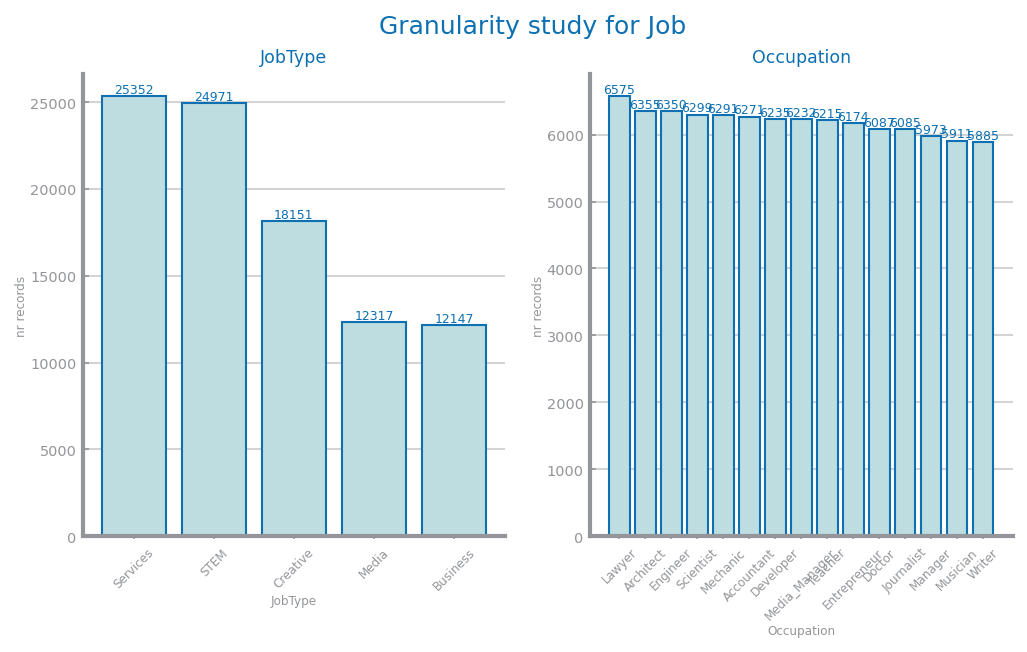

In [4]:
analyse_property_granularity(df, "Job", ["JobType", "Occupation"])
savefig(f"images/gran_spar/figure_granularity_job.png")
show()

In [ ]:
from matplotlib.figure import Figure
from numpy import ndarray
from pandas import DataFrame, Series
from dslabs_functions import HEIGHT

def analyse_property_granularity(
    data: DataFrame, property: str, vars
) -> ndarray:
    cols: int = len(vars)
    fig: Figure
    axs: ndarray
    fig, axs = plt.subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"Granularity study for {property}")
    for i in range(cols):
        counts: Series[int] = data[vars[i]].value_counts()
        ds.plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=vars[i],
            xlabel=vars[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs

analyse_property_granularity(df, "Payment Behaviour", ["Payment_Behaviour_Spend", "Payment_Behaviour_Value"])
savefig(f"images/gran_spar/figure_granularity_pb.png")
show()

In [ ]:
# Loan Type Granularity

Loan_category = {
    'Home Equity Loan': 'Home',
    'Mortgage Loan': 'Home',
    'Debt Consolidation Loan': 'Personal',
    'Personal Loan': 'Personal',
    'Credit-Builder Loan': 'Personal',
    'Payday Loan': 'Personal',
    'Auto Loan': 'Family',
    'Student Loan': 'Family',
    'Not Specified' : 'Not Specified'
}

types = df["Type_of_Loan"].dropna()

types_values = []
for text in types:
    matches = re.findall(r'([\w\s-]+)(?:, | and |$)', str(text))
    m_filtered = [m if "and" not in m else m[4:] for m in matches]
    types_values += m_filtered

final = pd.Series(types_values)

loans = pd.DataFrame({"Loan_name" : final, "Loan_category": pd.Series([])})
loans["Loan_category"] = loans["Loan_name"].map(lambda loan: Loan_category[str(loan)])
loans.head(9)

analyse_property_granularity(loans, "Loan Category", ["Loan_category", "Loan_name"])
savefig(f"images/gran_spar/figure_granularity_loan_category.png")
show()

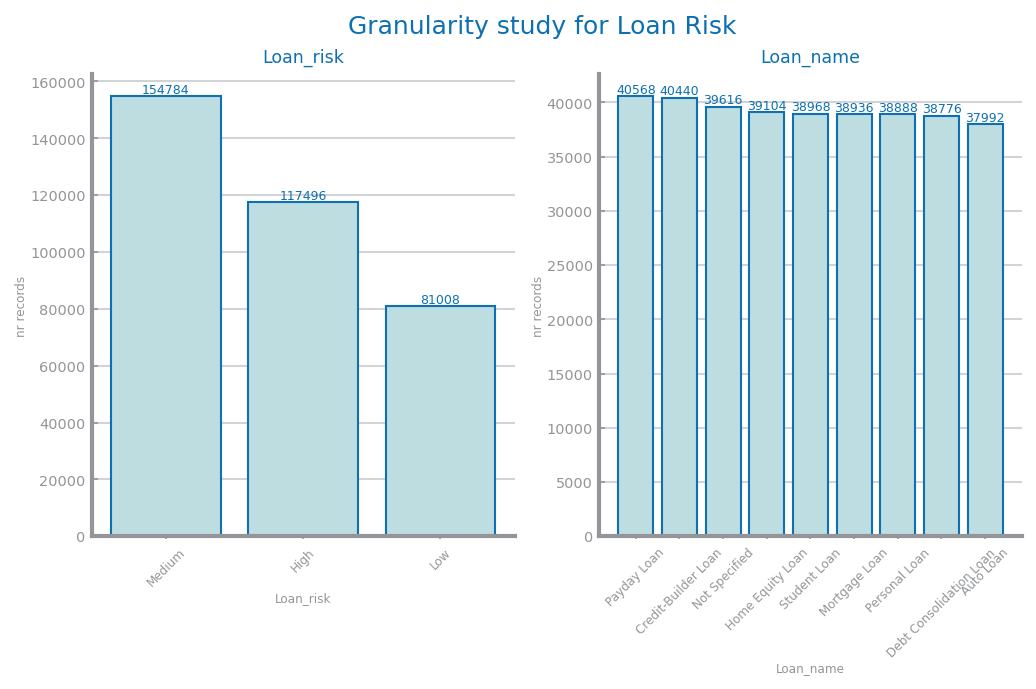

In [5]:
# Loan Type Granularity

Loan_category = {
    'Home Equity Loan': 'High',
    'Mortgage Loan': 'Medium',
    'Debt Consolidation Loan': 'High',
    'Personal Loan': 'Medium',
    'Credit-Builder Loan': 'Low',
    'Payday Loan': 'Low',
    'Auto Loan': 'Medium',
    'Student Loan': 'Medium',
    'Not Specified' : 'High'
}

types = df["Type_of_Loan"].dropna()

types_values = []
for text in types:
    matches = re.findall(r'([\w\s-]+)(?:, | and |$)', str(text))
    m_filtered = [m if "and" not in m else m[4:] for m in matches]
    types_values += m_filtered

final = pd.Series(types_values)

loans = pd.DataFrame({"Loan_name" : final, "Loan_risk": pd.Series([])})
loans["Loan_risk"] = loans["Loan_name"].map(lambda loan: Loan_category[str(loan)])
loans.head(9)

analyse_property_granularity(loans, "Loan Risk", ["Loan_risk", "Loan_name"])
savefig(f"images/gran_spar/figure_granularity_loan_risk.png")
show()